# **LLM.int8()**

### 8-bit quatization of LLMs

In [2]:
'''
    load_in_8bit (`bool`, *optional*, defaults to `False`):
                This flag is used to enable 8-bit quantization with LLM.int8().


    load_in_4bit (`bool`, *optional*, defaults to `False`):
        This flag is used to enable 4-bit quantization by replacing the Linear layers with FP4/NF4 layers from
        `bitsandbytes`.


    llm_int8_threshold (`float`, *optional*, defaults to 6.0):
        This corresponds to the outlier threshold for outlier detection as described in `LLM.int8() : 8-bit Matrix
        Multiplication for Transformers at Scale` paper: https://arxiv.org/abs/2208.07339 Any hidden states value
        that is above this threshold will be considered an outlier and the operation on those values will be done
        in fp16. Values are usually normally distributed, that is, most values are in the range [-3.5, 3.5], but
        there are some exceptional systematic outliers that are very differently distributed for large models.
        These outliers are often in the interval [-60, -6] or [6, 60]. Int8 quantization works well for values of
        magnitude ~5, but beyond that, there is a significant performance penalty. A good default threshold is 6,
        but a lower threshold might be needed for more unstable models (small models, fine-tuning).

'''

'\n    load_in_8bit (`bool`, *optional*, defaults to `False`):\n                This flag is used to enable 8-bit quantization with LLM.int8().\n\n\n    load_in_4bit (`bool`, *optional*, defaults to `False`):\n        This flag is used to enable 4-bit quantization by replacing the Linear layers with FP4/NF4 layers from\n        `bitsandbytes`.\n\n\n    llm_int8_threshold (`float`, *optional*, defaults to 6.0):\n        This corresponds to the outlier threshold for outlier detection as described in `LLM.int8() : 8-bit Matrix\n        Multiplication for Transformers at Scale` paper: https://arxiv.org/abs/2208.07339 Any hidden states value\n        that is above this threshold will be considered an outlier and the operation on those values will be done\n        in fp16. Values are usually normally distributed, that is, most values are in the range [-3.5, 3.5], but\n        there are some exceptional systematic outliers that are very differently distributed for large models.\n        These

## NF-4 (Normal Float 4 bit  )

In [5]:
from matplotlib import pyplot as plt 


nf4_values = [-1.0, -0.6961928009986877, -0.5250730514526367, -0.39491748809814453, -0.28444138169288635, -0.18477343022823334, -0.09105003625154495, 0.0, 0.07958029955625534, 0.16093020141124725,
0.24611230194568634, 0.33791524171829224, 0.44070982933044434, 0.5626170039176941, 0.7229568362236023, 1.0]


In [21]:
len(nf4_values)

16

In [6]:
nf4_bins = []

for i in range(1,len(nf4_values)):
    nf4_bins.append(nf4_values[i] - nf4_values[i-1])

In [8]:
nf4_bins

[0.30380719900131226,
 0.17111974954605103,
 0.1301555633544922,
 0.11047610640525818,
 0.09966795146465302,
 0.09372339397668839,
 0.09105003625154495,
 0.07958029955625534,
 0.08134990185499191,
 0.08518210053443909,
 0.0918029397726059,
 0.1027945876121521,
 0.12190717458724976,
 0.1603398323059082,
 0.2770431637763977]

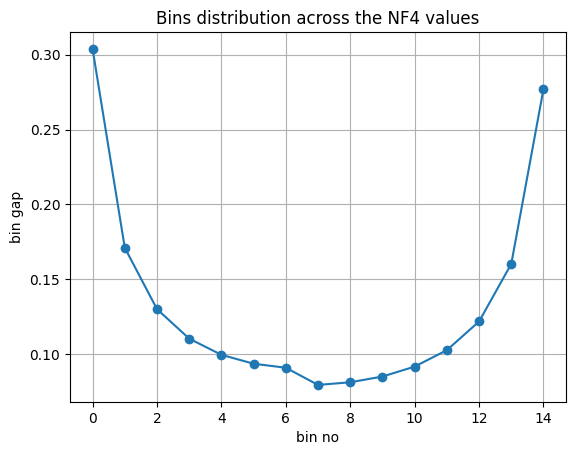

In [22]:
plt.plot(nf4_bins, marker='o', linestyle='-')


plt.xlabel('bin no')
plt.ylabel('bin gap')
plt.title('Bins distribution across the NF4 values')
plt.grid(True)
plt.show()